In [150]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
df=pd.read_csv('titanic_toy.csv')
df.sample(6)

,Age,Fare,Family,Survived
776,NaN,7.7500,0,0
704,26.0,7.8542,1,0
736,48.0,34.3750,4,0
239,33.0,12.2750,0,0
442,25.0,7.7750,1,0
619,26.0,10.5000,0,0


In [152]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [153]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [154]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [155]:
x_train.shape,x_train.shape,y_train.shape,y_test.shape

((712, 3), (712, 3), (712,), (179,))

In [156]:
x_train.isnull().sum()

Age       140
Fare       36
Family      0
dtype: int64

In [157]:
# age and fare is having null value


In [158]:
x_train['Age_arb']=x_train['Age'].fillna(99)
x_train['Fare_arb']=x_train['Fare'].fillna(-1)

In [159]:
x_train.sample(10)

,Age,Fare,Family,Age_arb,Fare_arb
331,45.5,28.5000,0,45.5,28.5000
308,30.0,24.0000,1,30.0,24.0000
798,30.0,7.2292,0,30.0,7.2292
675,18.0,7.7750,0,18.0,7.7750
768,NaN,24.1500,1,99.0,24.1500
635,28.0,13.0000,0,28.0,13.0000
648,NaN,7.5500,0,99.0,7.5500
425,NaN,7.2500,0,99.0,7.2500
415,NaN,8.0500,0,99.0,8.0500
88,23.0,263.0000,5,23.0,263.0000


In [160]:
# variance
print("original variance of age:",x_train['Age'].var())
print("variance of age_arb:",x_train['Age_arb'].var())
print("original variance of Fare:",x_train['Fare'].var())
print(" variance of Frae_Arbitary:",x_train['Fare_arb'].var())


original variance of age: 210.2517072477435
variance of age_arb: 932.9665366701432
original variance of Fare: 2761.0314349486343
 variance of Frae_Arbitary: 2675.2394049177024


Text(0.5, 1.0, 'AGe and AGe_arb')

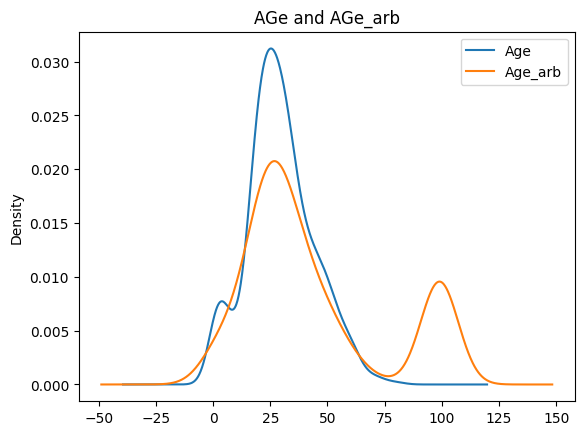

In [161]:
fig=plt.size=(15,8)
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Age'].plot(kind='kde',ax=ax)
x_train['Age_arb'].plot(kind='kde',ax=ax)
ax.legend()
# ax.set_xlabel('age')
ax.set_title('AGe and AGe_arb')

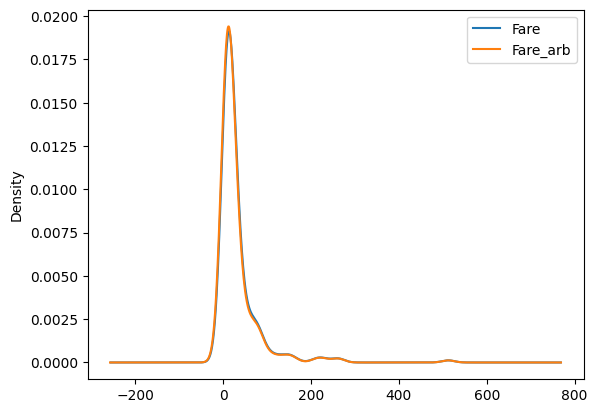

In [162]:
fig=plt.size=(15,8)
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Fare'].plot(kind='kde',ax=ax)
x_train['Fare_arb'].plot(kind='kde',ax=ax)
ax.legend()

## Using sklearn

In [163]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



# Simple imputer

In [164]:
from sklearn.impute import SimpleImputer

In [165]:
imputer1_actTran=SimpleImputer(strategy='constant',fill_value=99)
imputer2_actTran=SimpleImputer(strategy='constant',fill_value=999)

# using column transformer

In [166]:
from sklearn.compose import ColumnTransformer

In [ ]:
trf=ColumnTransformer([
    ('imputer1',imputer1_actTran,['Age']),
    ('imputer2',imputer2_actTran,['Fare'])
],remainder='passthrough')
# imputer1_actTran:actual tranformer and imputer1 is the name given by us to the col ColumnTransformer

In [168]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [169]:
trf.fit(x_train)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [171]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

* What it does:
* trf → is your ColumnTransformer object.
* named_transformers_ → gives you access to individual transformers (like your SimpleImputer) after fitting.
* ['imputer1'] → fetches the transformer named 'imputer1'.
* .statistics_ → is an attribute of SimpleImputer that stores the value used to impute missing data.

In [172]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [174]:
x_train_transfrom=trf.transform(x_train)
x_test_transfrom=trf.transform(x_test)

In [176]:
x_train_transfrom


array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    , 999.    ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])